In [1]:
#pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

import category_encoders as ce
from feature_engineering import encoding


## Load Dataset

In [3]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./data/titanic.csv', usecols=use_cols)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

## One-hot encoding
replace the categorical variable by different boolean variables (0/1) to indicate whether or not certain label is true for that observation

In [5]:
data1 = pd.get_dummies(data,drop_first=True)

In [6]:
data1.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_male
0,0,3,22.0,1,7.2500,True
1,1,1,38.0,1,71.2833,False
2,1,3,26.0,0,7.9250,False
3,1,1,35.0,1,53.1000,False
4,0,3,35.0,0,8.0500,True


## Ordinal-encoding
replace the labels by some ordinal number if ordinal is meaningful

In [7]:
ord_enc = ce.OrdinalEncoder(cols=['Sex']).fit(X_train,y_train)

In [8]:
data4 = ord_enc.transform(data)
print(data4.head(5))

   Survived  Pclass  Sex   Age  SibSp     Fare
0         0       3    1  22.0      1   7.2500
1         1       1    2  38.0      1  71.2833
2         1       3    2  26.0      0   7.9250
3         1       1    2  35.0      1  53.1000
4         0       3    1  35.0      0   8.0500


## Mean encoding
replace the label by the mean of the target for that label. 
(the target must be 0/1 valued or continuous)


In [9]:
# cross check-- the mean of target group by Sex
X_train['Survived'].groupby(data['Sex']).mean()


Sex
female    0.753488
male      0.196078
Name: Survived, dtype: float64

In [10]:
mean_enc = encoding.MeanEncoding(cols=['Sex']).fit(X_train,y_train)

In [11]:
data6 = mean_enc.transform(data)
print(data6.head(5))

   Survived  Pclass       Sex   Age  SibSp     Fare
0         0       3  0.196078  22.0      1   7.2500
1         1       1  0.753488  38.0      1  71.2833
2         1       3  0.753488  26.0      0   7.9250
3         1       1  0.753488  35.0      1  53.1000
4         0       3  0.196078  35.0      0   8.0500


## Target-encoding
Similar to mean encoding, but use both posterior probability and prior probability of the target

¿Qué es el Target Encoding?

Es una técnica que reemplaza los valores de una columna categórica con el promedio del target (variable objetivo) para cada categoría.

In [12]:
# create the encoder and fit with our data
target_enc = ce.TargetEncoder(cols=['Sex']).fit(X_train,y_train)

In [13]:
# perform transformation
# data.Survived.groupby(data['Sex']).agg(['mean'])
data2 = target_enc.transform(data)

In [14]:
# check the result
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,0.196078,22.0,1,7.2500
1,1,1,0.753488,38.0,1,71.2833
2,1,3,0.753488,26.0,0,7.9250
3,1,1,0.753488,35.0,1,53.1000
4,0,3,0.196078,35.0,0,8.0500


## WOE-encoding
replace the label  with Weight of Evidence of each label. WOE is computed from the basic odds ratio: 

ln( (Proportion of Good Outcomes) / (Proportion of Bad Outcomes))

WOE (Weight of Evidence) es una técnica común en análisis de riesgo crediticio. 

Reemplaza cada categoría con un valor numérico basado en la distribución de la variable objetivo (y_train) para esa categoría.

Se usa principalmente cuando el objetivo es binario (como 0 = No, 1 = Sí).

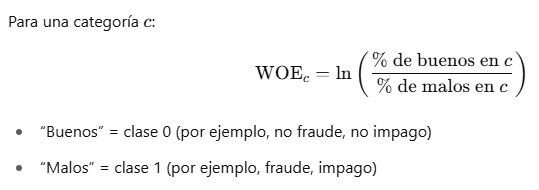

In [15]:
woe_enc = ce.WOEEncoder(cols=['Sex']).fit(X_train,y_train)

In [16]:
data3 = woe_enc.transform(data)

In [17]:
data3.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,-0.950742,22.0,1,7.2500
1,1,1,1.555633,38.0,1,71.2833
2,1,3,1.555633,26.0,0,7.9250
3,1,1,1.555633,35.0,1,53.1000
4,0,3,-0.950742,35.0,0,8.0500
